# Problem 1.4 - Dimension Reduction via PCA

In [12]:
import urllib.request
import gzip
import shutil
import numpy as np
import pandas as pd
urllib.request.urlretrieve("https://hastie.su.domains/ElemStatLearn/datasets/zip.train.gz",filename='./digits_train')
with gzip.open('digits_train', 'rb') as f_in:
    with open('digits_train.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
# Load into data frame
data_train = pd.read_csv('digits_train.txt', header=None, delimiter= ' ')

# Extract features x and labels y
x = data_train.iloc[:, 1:-1].values # Training data has one column of NaN entries
y = data_train.iloc[:, 0].values

indices = np.where(y == 3)[0]
x = x[indices]

In [13]:
data_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


### What do these lines do?
1-5: importing the needed libraries  
6:   downloads the training data from the website as zip.train.gz (compressed dataset of digit images)  
7:   opens the training file in 'rb'-mode so for reading in binary  
8:   opens a new txt file for writing ('wb')  
9:   copies the content from the compressed input file into the output file -> now we have a plain .txt file containing the dataset  
10:  loads the dataset into a pandas-dataframe. There is no header row in the file. Numbers are separated by whitespaces.  
11:  x contains the pixel values as a numpy array. All rows and columns from 1 to (not including) last. We skip 0 (labels) and last (NaN). -> x = matrix(n_samples, 265)  
12:  y contains the corresponding labels i.e. which digit it is. (0-9) -> y = 1D array of all digit labels.  
13:  indices is a vector selecting all row numbers where the digit is 3. (boolean mask)  
14:  takes those rows from x where the label was 3 -> x contains only images of 3  

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

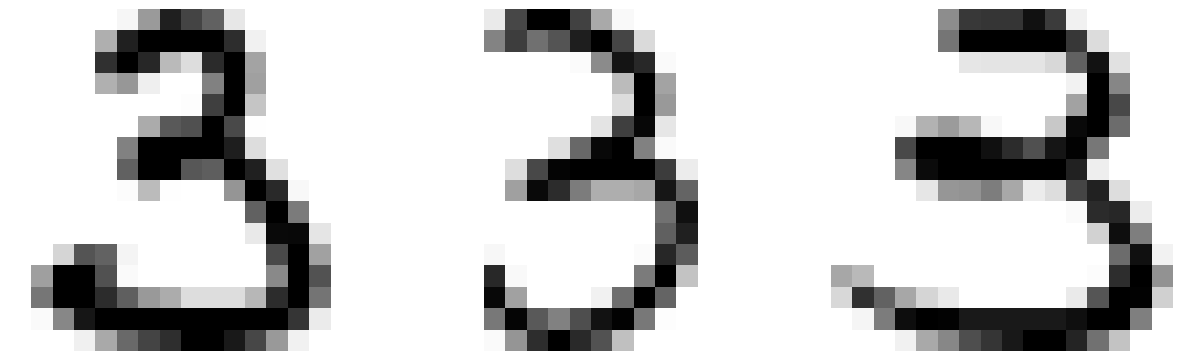

In [15]:
# Plot first three instances: (copied from the instructions in moodle)
fig, ax = plt.subplots(1,3,figsize = (15,45))
ax[0].imshow(x[0].reshape(16,16), cmap = 'gray_r')
ax[0].axis('off');
ax[1].imshow(x[1].reshape(16,16), cmap = 'gray_r')
ax[1].axis('off');
ax[2].imshow(x[2].reshape(16,16), cmap = 'gray_r')
ax[2].axis('off');

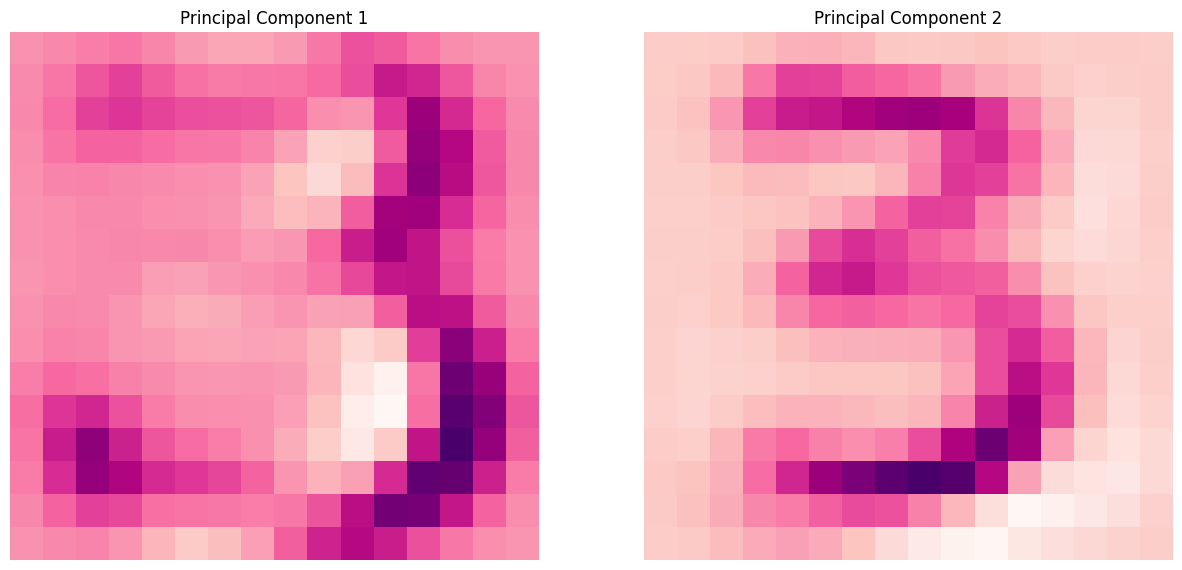

In [16]:
pca = PCA(n_components = 2)
x_reduced = pca.fit_transform(x)
V_q = pca.components_

plt.figure(figsize = (15,45))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(V_q[i].reshape(16,16), cmap = 'RdPu')
    plt.title(f'Principal Component {i + 1}')
    plt.axis('off')
plt.show()

## Interpretation:
As we sampled onto rank 2, each image is described by two two numbers. The pictures describe the typical ways in which a handwritten 3 can vary.  
Idea:  
PC1 - describes variantion in top and bottom curve of the 3s  
PC2 - pictures roundness/curvature of the 3s


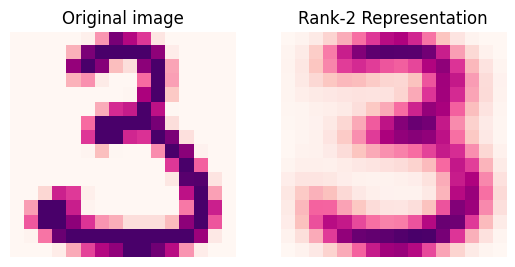

In [17]:
# Plot rank-2 Interpretation of one digit

x0 = x[0]
x0_reduced = pca.transform(x0.reshape(1, -1))
x0_reconstructed = pca.inverse_transform(x0_reduced)

plt.subplot(1,2,1)
plt.imshow(x0.reshape(16,16), cmap = 'RdPu')
plt.title("Original image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(x0_reconstructed.reshape(16,16), cmap = 'RdPu')
plt.title("Rank-2 Representation")
plt.axis('off')

plt.show()

### Bonus:

In [18]:
errors = []

for q in range(1,257):
    pca = PCA(n_components = q)
    x_reduced = pca.fit_transform(x)
    x_reconstructed = pca.inverse_transform(x_reduced)

    E_q = np.mean(np.linalg.norm(x - x_reconstructed) / np.linalg.norm(x))
    errors.append(E_q)

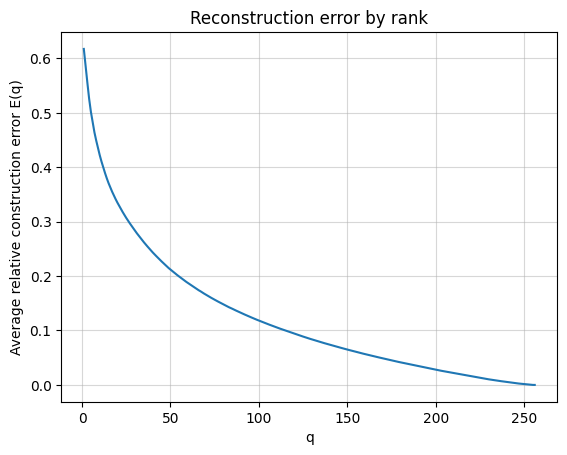

First q with error < 1/3:  21


In [19]:
plt.plot(range(1,257), errors)
plt.xlabel("q")
plt.ylabel("Average relative construction error E(q)")
plt.title("Reconstruction error by rank")
plt.grid(True, alpha = 0.5)
plt.show()

q_threshold = np.argmax(np.array(errors) < 1/3) + 1 # returns first index where condition is met, +1 for 1-based index
print("First q with error < 1/3: ", q_threshold)